# Melbourne Housing price prediction

This capstone project uses data of houses in Melbourne to predict prices based on a few parameters. The required columns are first chosen and then cleaned. An appropriate model is selected and then it is fitted over the data to predict the values of the response variable i.e 'price'.
'Decision tree regressor' is the model we will be using to calculate the price.

In [68]:
# We are importing the necessary python libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#The raw data is read from the csv file using the pandas library and is assigned to a variable.
melbourne_data=pd.read_csv("melb_data.csv")

# We are printing the column headers as seen in the csv file. This would help us to better understand the feature/target 
# variables for our problem.
print(melbourne_data.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [69]:
# Data cleaning - The rows which are null/having any missing values are excluded from our analysis.
# This might not always be the outright solution but for simplicity we are excluding it.
melbourne_data = melbourne_data.dropna(axis=0)

In [70]:
# 'shape' attribute will give the number of rows and columns of the data.

melbourne_data.shape

(6196, 21)

In [71]:
#A single column from a dataframe can be accessed using the dot (.) accessor. 

y=melbourne_data.Price

#Alternatively using square brackets. ['column_name']. 'Price' is the target variable which needs to be computed using our model.
y=melbourne_data['Price']

In [72]:
# Feature columns are chosen based on which our target variable is calculated.

features=['Rooms' , 'Bathroom' , 'Landsize' , 'Lattitude' , 'Longtitude']

In [73]:
# Copy of the original data with only the feature columns.

x=melbourne_data[features]

In [74]:
# 'Describe' function wil give in the basic statistics of the dataframe.

x.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [75]:
# 'Info' function will give certain details like number of columns,data-type,index etc

x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 5 columns):
Rooms         6196 non-null int64
Bathroom      6196 non-null float64
Landsize      6196 non-null float64
Lattitude     6196 non-null float64
Longtitude    6196 non-null float64
dtypes: float64(4), int64(1)
memory usage: 290.4 KB


In [76]:
# head will print the first 5 rows of our dataframe. 
# An integer argument passed witin head will print those many rows. 

x.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [77]:
# Machine learning.
# Importing the required modules from sklearn. 

from sklearn.tree import DecisionTreeRegressor

# The 'random state' parameter will ensure same results for each run.
model=DecisionTreeRegressor(random_state=1)

# Fitting the model over the data.
model.fit(x,y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [78]:
print('Making predictions for the first 10 houses')
print(x.head(10))

# Predicting the price for first ten rows using the 'predict' function.

print('The prices are:')
print(model.predict(x.head(10)))
      

Making predictions for the first 10 houses
    Rooms  Bathroom  Landsize  Lattitude  Longtitude
1       2       1.0     156.0   -37.8079    144.9934
2       3       2.0     134.0   -37.8093    144.9944
4       4       1.0     120.0   -37.8072    144.9941
6       3       2.0     245.0   -37.8024    144.9993
7       2       1.0     256.0   -37.8060    144.9954
9       2       1.0     220.0   -37.8010    144.9989
11      3       2.0     214.0   -37.8085    144.9964
12      2       2.0       0.0   -37.8078    144.9965
15      2       1.0     238.0   -37.8090    144.9976
16      3       2.0     113.0   -37.8056    144.9930
The prices are:
[1035000. 1465000. 1600000. 1876000. 1636000. 1097000. 1350000.  750000.
 1310000. 1200000.]


In [79]:
# Using the 'predict' function to predict the price for all the rows in the dataset.

melbourne_data['Predicted_Price'] = model.predict(x)

In [80]:
# Average value of the entire range of houses is calculated using 'mean' function of numpy library.

avg = np.mean(melbourne_data['Predicted_Price'])
print("Avg value :")
print(avg)

Avg value :
1068828.2020658492


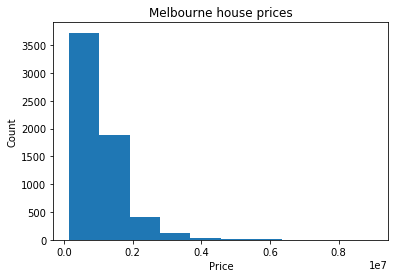

In [87]:
plt.hist(melbourne_data['Predicted_Price'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Melbourne house prices')
plt.show()